# Monte Carlo - wyznaczanie liczby PI
### Import bibliotek podstawowych

In [34]:
import numpy as np
from matplotlib import pyplot as plt

### Funkcja estymująca liczbę PI
- wylosuj wartość dla X z przedziału (-1, 1)
- wylosuj wartość dla Y z przedziału (-1, 1)

jeżeli punkt o tych współżędnych znajduje się w okręgu jednostkowym (x^2 + y^2 = 1) to inkrementujemy zmienną "circle_points"

obliczamy wartość PI ze wzoru  4 * circle_points / samples

In [35]:
def find_pi(samples):
  circle_points = 0
  rand_x = np.random.uniform(-1, 1, samples)   # tutaj użyj legitnego generatora
  rand_y = np.random.uniform(-1, 1, samples)   # tutaj użyj legitnego generatora
  origin_dist = np.power(rand_x, 2) + np.power(rand_y, 2)

  for point in origin_dist:
    if point <= 1:
      circle_points += 1

  pi = 4 * circle_points / samples
  return pi


samples = 50000000  # około 14s
pi = find_pi(samples)
print("Samples:", samples)
print("Final estimation of Pi:", pi)  
print("Real Pi value:", np.pi)  
print("Error:", np.abs(pi - np.pi))  

Samples: 50000000
Final estimation of Pi: 3.14178128
Real Pi value: 3.141592653589793
Error: 0.00018862641020689352


### Wizualizacja estymacji liczby PI

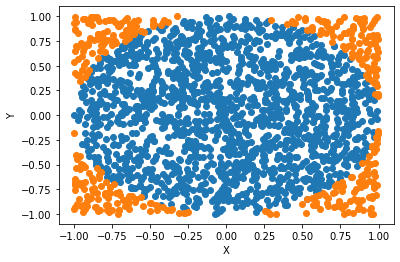

In [36]:
count = 2000
circle_points_x = []
circle_points_y = []
not_circle_points_x = []
not_circle_points_y = []

rand_x = np.random.uniform(-1, 1, count)   # tutaj użyj legitnego generatora
rand_y = np.random.uniform(-1, 1, count)   # tutaj użyj legitnego generatora
distance = rand_x**2 + rand_y**2

for i in range(distance.size):
  if distance[i] <= 1:
    circle_points_x.append(rand_x[i])
    circle_points_y.append(rand_y[i])
  else:
    not_circle_points_x.append(rand_x[i])
    not_circle_points_y.append(rand_y[i])


fig, (ax) = plt.subplots(1, 1)
ax.plot(circle_points_x, circle_points_y, 'o')
ax.plot(not_circle_points_x, not_circle_points_y, 'o')
ax.set_ylabel('Y')
ax.set_xlabel('X')
plt.show()

### Błąd estymacji w zależności od ilości iteracji

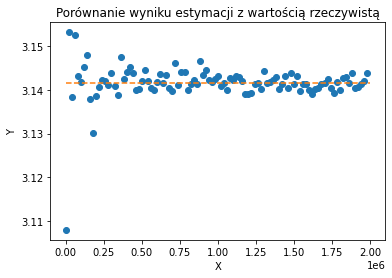

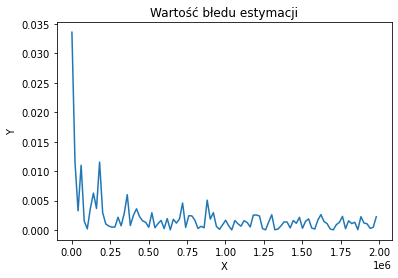

In [40]:
count = 2000000
results = []
error = []
samples = np.arange(1000, count, int(count/100))

f = lambda samples: find_pi(samples)

for i in samples:
  results.append(f(i))

for result in results:
  error.append(abs(result - np.pi))


x = np.linspace(0, count)

fig, (ax) = plt.subplots(1, 1)
ax.plot(samples, results, 'o')
ax.plot(x, x*0 + np.pi, linestyle='dashed')
ax.set_ylabel('Y')
ax.set_xlabel('X')
ax.set_title("Porównanie wyniku estymacji z wartością rzeczywistą")

fig2, (ax2) = plt.subplots(1, 1)
ax2.plot(samples, error, '-')
ax2.set_ylabel('Y')
ax2.set_xlabel('X')
ax2.set_title("Wartość błedu estymacji")

plt.show() # czas trwania ~27s